In [1]:
from pandas import read_csv
import random
from numpy import array
import numpy as np
import matplotlib.pyplot as plt
import math
from random import seed
from random import randrange

In [3]:
#import csv
filename = 'Iris.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width','class','v1', 'v2']
dataset_csv = read_csv(filename, names=names)

In [4]:
# Data Lookup
print(dataset_csv.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class  v1  v2
0            5.1          3.5           1.4          0.2  Iris-setosa   0   0
1            4.9          3.0           1.4          0.2  Iris-setosa   0   0
2            4.7          3.2           1.3          0.2  Iris-setosa   0   0
3            4.6          3.1           1.5          0.2  Iris-setosa   0   0
4            5.0          3.6           1.4          0.2  Iris-setosa   0   0
5            5.4          3.9           1.7          0.4  Iris-setosa   0   0
6            4.6          3.4           1.4          0.3  Iris-setosa   0   0
7            5.0          3.4           1.5          0.2  Iris-setosa   0   0
8            4.4          2.9           1.4          0.2  Iris-setosa   0   0
9            4.9          3.1           1.5          0.1  Iris-setosa   0   0
10           5.4          3.7           1.5          0.2  Iris-setosa   0   0
11           4.8          3.4           1.6          0.2  Iris-s

In [5]:
# program function for sigmoid and output binary
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def output(x):
    if (x<0.5):
        return 0
    else:
        return 1

In [6]:
arr = dataset_csv.values
X = arr[:,0:4] 
Y1 = arr[:,5]
Y2 = arr[:,6]
print(X)
print(len(X))

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [41]:
# Split a dataset into k folds
def cross_validation_split(x1,x2,x3, folds):
    dataset_split = list()
    dataset_copy1 = list(x1) 
    dataset_copy2 = list(x2) 
    dataset_copy3 = list(x3) 
    fold_size = int((len(dataset)+len(dataver)+len(datavir))/folds)
    for i in range(folds):
        fold = list()
        while len(fold) < fold_size:
            if len(dataset_copy1)>0: 
                index1 = randrange(len(dataset_copy1))
                fold.append(dataset_copy1.pop(index1))
            if len(dataset_copy2)>0:
                index2 = randrange(len(dataset_copy2))
                fold.append(dataset_copy2.pop(index2))
            if len(dataset_copy3)>0:
                index3 = randrange(len(dataset_copy3))
                fold.append(dataset_copy3.pop(index3))
            if len(dataset_copy1)==0 and len(dataset_copy2)==0 and len(dataset_copy3)==0:
                break
            dataset_split.append(fold)
    return dataset_split
 
# test cross validation split
seed(1)
dataset = []
dataver = []
datavir = []
train = []
# fold number
fold = 5
for x1 in range(50):
    dataset.append(x1)
    dataver.append(x1+50)
    datavir.append(x1+100)
test = cross_validation_split(dataset,dataver,datavir,fold)
for i in range(fold):
    train.append(i)
    print("Test ", i+1," : ",sorted(test[i],key=int))
    train[i] = [x for x in dataset if x not in test[i]]
    train[i] += [x for x in dataver if x not in test[i]]
    train[i] += [x for x in datavir if x not in test[i]]
    print("Train ", i+1," : ",train[i])
    print("Test Data :",len(test[i]),"Train Data :",len(train[i]),"\n")

Test  1  :  [0, 2, 4, 7, 8, 18, 25, 27, 33, 44, 51, 66, 75, 79, 80, 82, 84, 86, 92, 94, 100, 101, 102, 107, 108, 114, 120, 131, 142, 148]
Train  1  :  [1, 3, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 26, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 81, 83, 85, 87, 88, 89, 90, 91, 93, 95, 96, 97, 98, 99, 103, 104, 105, 106, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 149]
Test Data : 30 Train Data : 120 

Test  2  :  [0, 2, 4, 7, 8, 18, 25, 27, 33, 44, 51, 66, 75, 79, 80, 82, 84, 86, 92, 94, 100, 101, 102, 107, 108, 114, 120, 131, 142, 148]
Train  2  :  [1, 3, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 26, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 

In [36]:
for x in range(len(train[0])) :
    print(X[train[0][x]])

[5.1 3.5 1.4 0.2]
[4.9 3.0 1.4 0.2]
[4.7 3.2 1.3 0.2]
[4.6 3.1 1.5 0.2]
[5.4 3.9 1.7 0.4]
[4.6 3.4 1.4 0.3]
[4.9 3.1 1.5 0.1]
[5.4 3.7 1.5 0.2]
[4.8 3.4 1.6 0.2]
[4.8 3.0 1.4 0.1]
[4.3 3.0 1.1 0.1]
[5.8 4.0 1.2 0.2]
[5.7 4.4 1.5 0.4]
[5.4 3.9 1.3 0.4]
[5.1 3.5 1.4 0.3]
[5.7 3.8 1.7 0.3]
[5.1 3.8 1.5 0.3]
[5.4 3.4 1.7 0.2]
[5.1 3.7 1.5 0.4]
[4.6 3.6 1.0 0.2]
[5.1 3.3 1.7 0.5]
[4.8 3.4 1.9 0.2]
[5.0 3.0 1.6 0.2]
[5.0 3.4 1.6 0.4]
[5.2 3.5 1.5 0.2]
[5.2 3.4 1.4 0.2]
[4.7 3.2 1.6 0.2]
[4.8 3.1 1.6 0.2]
[5.4 3.4 1.5 0.4]
[5.2 4.1 1.5 0.1]
[4.9 3.1 1.5 0.1]
[5.0 3.2 1.2 0.2]
[5.5 3.5 1.3 0.2]
[4.9 3.1 1.5 0.1]
[4.4 3.0 1.3 0.2]
[5.1 3.4 1.5 0.2]
[5.0 3.5 1.3 0.3]
[4.5 2.3 1.3 0.3]
[4.4 3.2 1.3 0.2]
[5.0 3.5 1.6 0.6]
[4.8 3.0 1.4 0.3]
[5.1 3.8 1.6 0.2]
[4.6 3.2 1.4 0.2]
[5.3 3.7 1.5 0.2]
[5.0 3.3 1.4 0.2]
[7.0 3.2 4.7 1.4]
[6.4 3.2 4.5 1.5]
[6.9 3.1 4.9 1.5]
[5.5 2.3 4.0 1.3]
[6.5 2.8 4.6 1.5]
[5.7 2.8 4.5 1.3]
[6.3 3.3 4.7 1.6]
[4.9 2.4 3.3 1.0]
[6.6 2.9 4.6 1.3]
[5.2 2.7 3.9 1.4]
[5.0 2.0 3

|Fold :  1 |
 ----------
TRAIN DATA
Epoch :  1
Average Error :  0.466759062621227
Algortihm Accuracy :  0.2833333333333333

TEST DATA
Weight 1 : [0.8231967798130964, 0.4236962074332769, 0.7394115725800696, 0.27838329391872424]
Bias 1 :  0.2594543411574387
Weight 2 : [-0.25402952375406357, -0.5318875135050182, -0.10361067381963837, 0.06384929926001429]
Bias 2 :  0.05008518262926322
Average Error :  0.4882131325261116
Algortihm Accuracy :  0.3333333333333333
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  2
Average Error :  0.37596910214174845
Algortihm Accuracy :  0.2833333333333333

TEST DATA
Weight 1 : [0.7539445028072139, 0.3786849563668357, 0.7162302471063421, 0.2738422520122717]
Bias 1 :  0.2453340728328442
Weight 2 : [-0.2320773658500874, -0.5273752062135164, -0.12065953001944431, 0.03028867003039756]
Bias 2 :  0.05752131312802007
Average Error :  0.4876362607383915
Algortihm Accuracy :  0.3333333333333333
-

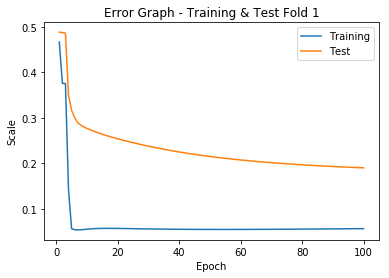

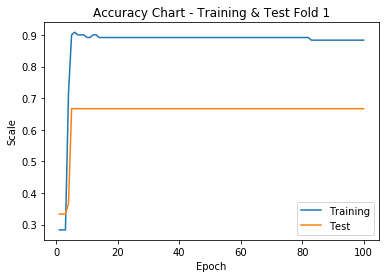

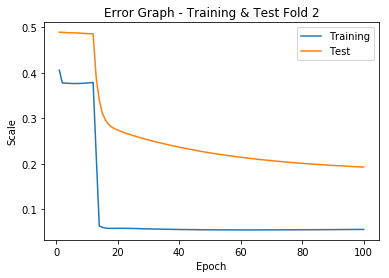

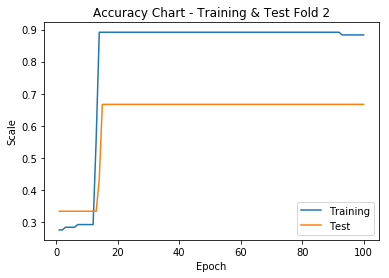

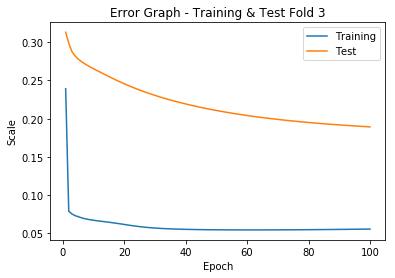

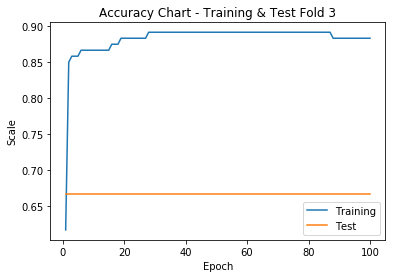

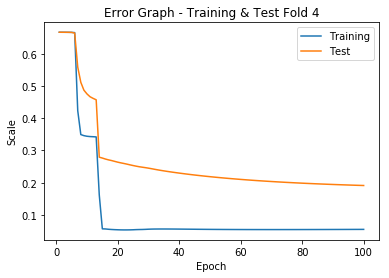

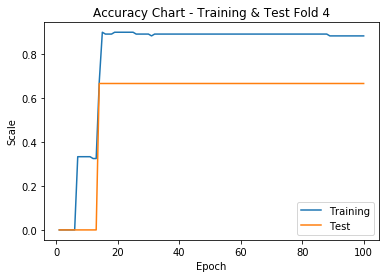

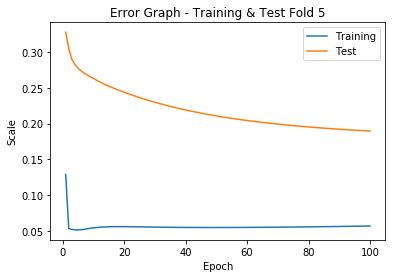

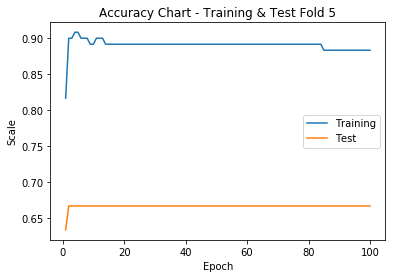

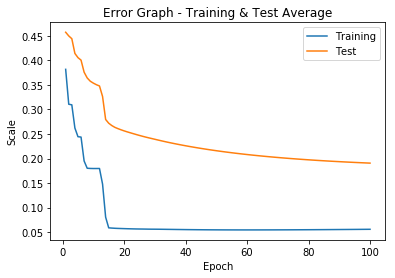

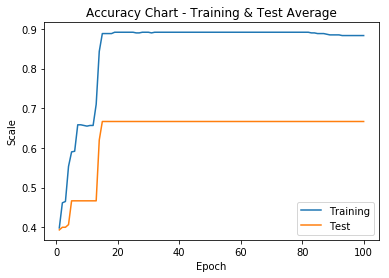

In [42]:
pla = []
ple = []
plat = []
plet = []

for i in range(5):
    #Train Data
    # linear equations classifier function

    w1 = random.uniform(0, 1) 
    w2 = random.uniform(0, 1) 
    w3 = random.uniform(0, 1) 
    w4 = random.uniform(0, 1)
    b1 = random.uniform(0, 1)

    dw1 = []
    dw2 = []
    dw3 = []
    dw4 = []
    db1 = []

    t1 = []
    sig1 = []
    err1 = []

    w5 = random.uniform(0, 1) 
    w6 = random.uniform(0, 1) 
    w7 = random.uniform(0, 1) 
    w8 = random.uniform(0, 1)
    b2 = random.uniform(0, 1)

    dw5 = []
    dw6 = []
    dw7 = []
    dw8 = []
    db2 = []

    t2 = []
    sig2 = []
    err2 = []


    tt1 = []
    sigt1 = []
    errt1 = []

    tt2 = []
    sigt2 = []
    errt2 = []

    l1= [w1, w2, w3, w4]
    l2= [w5, w6, w7, w8]

    a = []
    e = []
    epo = []


    at = []
    et = []
    epot = []
    
    print('|Fold : ', i+1,'|')
    print(' ----------')
    for epoch in range(1,101):
        print("TRAIN DATA")
        print('Epoch : ', epoch)
        # define learning rate (0.1/0.8)
        lr1 = 0.12
        # define accuracy variable 
        acc = 0
        acct = 0
        for x in range(0,len(train[i])) :
            #Append multiple array
            if(epoch==1):
                t1.append(0), sig1.append(0),err1.append(0), dw1.append(0), dw2.append(0), dw3.append(0), dw4.append(0), db1.append(0)
                t2.append(0), sig2.append(0), err2.append(0), dw5.append(0), dw6.append(0), dw7.append(0), dw8.append(0), db2.append(0)
                tt1.append(0),sigt1.append(0),errt1.append(0),tt2.append(0),sigt2.append(0),errt2.append(0)
            # Target
            # print("L1 : ", l1)*/
            t1[x] = sum(X[train[i][x]]*l1) + b1
            t2[x] = sum(X[train[i][x]]*l2) + b2
            # Sigmoid
            sig1[x] = sigmoid(t1[x])
            sig2[x] = sigmoid(t2[x])
            # Output
            #print("Output 1: ", output(sig1[x]))
            #print("Output 2: ", output(sig2[x]))
            #print("Y1 : ", Y1[train[i][x]])
            #print("Y2 : ", Y2[train[i][x]])
            if output(sig1[x]) == Y1[train[i][x]] and output(sig2[x]) == Y2[train[i][x]] :
                acc += 1
            #print("Accuracy : ", acc)
            # Error
            err1[x] = (sig1[x]-Y1[train[i][x]])**2
            #print("Error 1 : ", err1[x])
            err2[x] = (sig2[x]-Y2[train[i][x]])**2
            #print("Error 2 : ", err2[x])
            # Partial Derivative of Weight and Bias
            dw1[x] = 2*(sig1[x]-Y1[train[i][x]])*(1-sig1[x])*sig1[x]*X[train[i][x]][0]
            dw2[x] = 2*(sig1[x]-Y1[train[i][x]])*(1-sig1[x])*sig1[x]*X[train[i][x]][1]
            dw3[x] = 2*(sig1[x]-Y1[train[i][x]])*(1-sig1[x])*sig1[x]*X[train[i][x]][2]
            dw4[x] = 2*(sig1[x]-Y1[train[i][x]])*(1-sig1[x])*sig1[x]*X[train[i][x]][3]
            db1[x] = 2*(sig1[x]-Y1[train[i][x]])*(1-sig1[x])*sig1[x]*1
            dw5[x] = 2*(sig2[x]-Y2[train[i][x]])*(1-sig2[x])*sig2[x]*X[train[i][x]][0]
            dw6[x] = 2*(sig2[x]-Y2[train[i][x]])*(1-sig2[x])*sig2[x]*X[train[i][x]][1]
            dw7[x] = 2*(sig2[x]-Y2[train[i][x]])*(1-sig2[x])*sig2[x]*X[train[i][x]][2]
            dw8[x] = 2*(sig2[x]-Y2[train[i][x]])*(1-sig2[x])*sig2[x]*X[train[i][x]][3]
            db2[x] = 2*(sig2[x]-Y2[train[i][x]])*(1-sig2[x])*sig2[x]*1
            # Update the new value of weight and bias for next itteration
            w1 = w1-(lr1*dw1[x])
            w2 = w2-(lr1*dw2[x])
            w3 = w3-(lr1*dw3[x])
            w4 = w4-(lr1*dw4[x])
            b1 = b1-(lr1*db1[x])
            w5 = w5-lr1*dw5[x]
            w6 = w6-lr1*dw6[x]
            w7 = w7-lr1*dw7[x]
            w8 = w8-lr1*dw8[x]
            b2 = b2-lr1*db2[x]
            l1= [w1, w2, w3, w4]
            l2= [w5, w6, w7, w8]
            #print("------------------------------------------------------")
        # Error Average and Accuracy
        avg_err1 = (sum(err1[0:len(train[i])])/len(train[i]))
        avg_err2 = (sum(err2[0:len(train[i])])/len(train[i]))
        avg_err = (avg_err1+avg_err2)/2
        accuracy = (acc/len(train[i]))
        epo.append(epoch)
        a.append(accuracy)
        e.append(avg_err)
        #print("Error LC 1 : ", avg_err1)
        #print("Error LC 2 : ", avg_err2)
        print("Average Error : ", avg_err)
        print("Algortihm Accuracy : ", accuracy)
        #print("----------------------------------------------------------------------------------------------------")

        #Test Data  
        print("\nTEST DATA")
        print("Weight 1 :", l1)
        print("Bias 1 : ", b1)
        print("Weight 2 :", l2)
        print("Bias 2 : ", b2)

        for x in range(len(test[i])) :
            tt1[x] = sum(X[test[i][x]]*l1) + b1
            tt2[x] = sum(X[test[i][x]]*l2) + b2
            sigt1[x] = sigmoid(tt1[x])
            #print("Sigmoid 1 : ", sigt1[x])
            sigt2[x] = sigmoid(tt2[x])
            #print("Sigmoid 2 : ", sigt2[x])
            #print("Output 1: ", output(sigt1[x]))
            #print("Output 2: ", output(sigt2[x]))
            #print("Y1 : ", Y1[test[i][x]])
            #print("Y2 : ", Y2[test[i][x]])
            if output(sigt1[x]) == Y1[test[i][x]] and output(sigt2[x]) == Y2[test[i][x]] :
                acct += 1
            #print("Accuracy Test: ", acct)
            errt1[x] = (sigt1[x]-Y1[test[i][x]])**2
            errt2[x] = (sigt2[x]-Y2[test[i][x]])**2
            #print("------------------------------------------------------")
        avg_errt1 = (sum(errt1[0:len(test[i])])/len(test[i]))
        avg_errt2 = (sum(errt2[0:len(test[i])])/len(test[i]))
        avg_errt = (avg_errt1+avg_errt2)/2
        accuracyt = (acct/len(test[i]))
        at.append(accuracyt)
        et.append(avg_errt)
        #print("Error LC 1 : ", avg_errt1)
        #print("Error LC 2 : ", avg_errt2)
        print("Average Error : ", avg_errt)
        print("Algortihm Accuracy : ", accuracyt)
        print("----------------------------------------------------------------------------------------------------\n")
    
    pla.append(a)
    ple.append(e)
    plat.append(at)
    plet.append(et)
    
# Plotting Error and Accuracy Chart
plt.figure(1)
plt.plot(epo, ple[0],label='Training')
plt.plot(epo, plet[0],label='Test')
plt.title('Error Graph - Training & Test Fold 1')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Scale')

plt.figure(2)
plt.plot(epo, pla[0],label='Training')
plt.plot(epo, plat[0],label='Test')
plt.title('Accuracy Chart - Training & Test Fold 1')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Scale')

plt.figure(3)
plt.plot(epo, ple[1],label='Training')
plt.plot(epo, plet[1],label='Test')
plt.title('Error Graph - Training & Test Fold 2')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Scale')

plt.figure(4)
plt.plot(epo, pla[1],label='Training')
plt.plot(epo, plat[1],label='Test')
plt.title('Accuracy Chart - Training & Test Fold 2')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Scale')

plt.figure(5)
plt.plot(epo, ple[2],label='Training')
plt.plot(epo, plet[2],label='Test')
plt.title('Error Graph - Training & Test Fold 3')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Scale')

plt.figure(6)
plt.plot(epo, pla[2],label='Training')
plt.plot(epo, plat[2],label='Test')
plt.title('Accuracy Chart - Training & Test Fold 3')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Scale')

plt.figure(7)
plt.plot(epo, ple[3],label='Training')
plt.plot(epo, plet[3],label='Test')
plt.title('Error Graph - Training & Test Fold 4')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Scale')

plt.figure(8)
plt.plot(epo, pla[3],label='Training')
plt.plot(epo, plat[3],label='Test')
plt.title('Accuracy Chart - Training & Test Fold 4')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Scale')

plt.figure(9)
plt.plot(epo, ple[4],label='Training')
plt.plot(epo, plet[4],label='Test')
plt.title('Error Graph - Training & Test Fold 5')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Scale')

plt.figure(10)
plt.plot(epo, pla[4],label='Training')
plt.plot(epo, plat[4],label='Test')
plt.title('Accuracy Chart - Training & Test Fold 5')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Scale')

plt.figure(11)
plt.plot(epo, (np.array(ple[0])+np.array(ple[1])+np.array(ple[2])+np.array(ple[3])+np.array(ple[4]))/5,label='Training')
plt.plot(epo, (np.array(plet[0])+np.array(plet[1])+np.array(plet[2])+np.array(plet[3])+np.array(plet[4]))/5,label='Test')
plt.title('Error Graph - Training & Test Average')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Scale')

plt.figure(12)
plt.plot(epo, (np.array(pla[0])+np.array(pla[1])+np.array(pla[2])+np.array(pla[3])+np.array(pla[4]))/5,label='Training')
plt.plot(epo, (np.array(plat[0])+np.array(plat[1])+np.array(plat[2])+np.array(plat[3])+np.array(plat[4]))/5,label='Test')
plt.title('Accuracy Chart - Training & Test Average')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Scale')

plt.show()
